<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

$ \ $



# ***Simple Linear Regression.***

Estimated time needed: **15** minutes.

$ \ $

-----

## ***Objectives.***

After completing this lab you will be able to:

$(1)$   Use scikit-learn to implement simple Linear Regression.

$(2)$  Create a model, train it, test it and use the mode.


$ \ $

----

## ***Importing Needed packages.***

The following packages will be usefull to our work.


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns 
%matplotlib inline

$ \ $

----

## ***Downloading Data.***

To download the data, we will use !wget to download it from IBM Object Storage.


In [ ]:
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv


--2022-12-24 14:32:40--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.04s   

2022-12-24 14:32:40 (1.89 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



$ \ $ 

----

## ***Question (big data sets).***

When it comes to Machine Learning, you will likely be working with large datasets, and naturally arises a question:
 
 
$$\color{yellow}{\text{where can you host your data?}}$$

And some companies like Google and  IBM have the solution for this (money). 


$ \ $

-----

## ***Understanding the Data (FuelConsumption.csv).***


We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings (índices de consumo) and estimated carbon dioxide emissions for new light-duty (trabajo ligero) vehicles for retail sale in Canada.

$(1)$   **MODELYEAR** e.g. 2014

$(2)$   **MAKE** e.g. Acura

$(3)$    **MODEL** e.g. ILX

$(4)$    **VEHICLE CLASS** e.g. SUV

$(5)$    **ENGINE SIZE** e.g. 4.7

$(6)$    **CYLINDERS** e.g 6

$(7)$   **TRANSMISSION** e.g. A6

$(8)$    **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9

$(9)$    **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
 
$(10)$    **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2

$(11)$    **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


$ \ $

----

## ***Data reading.***

Below we read the **"FuelConsumption.csv"** data.


In [ ]:
df = pd.read_csv("FuelConsumption.csv")
df.head()


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


$ \ $

----

## ***Data Exploration.***

Let's first have a descriptive exploration on our data.


In [ ]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


$ \ $ 

----

## ***Some aditional data features (FuelConsumption.csv).***

$(1)$ Let's select some features to explore more.


In [ ]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


$ \ $

$(2)$ We can plot each of these features:


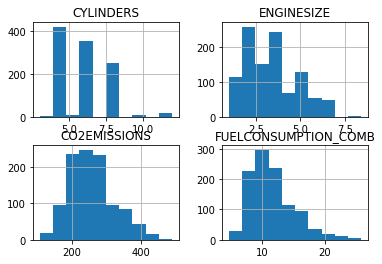

In [ ]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

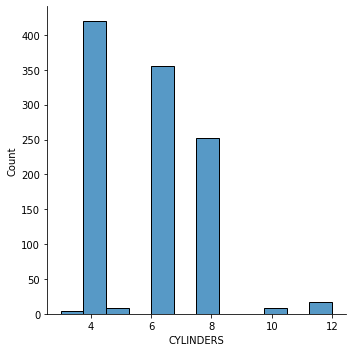

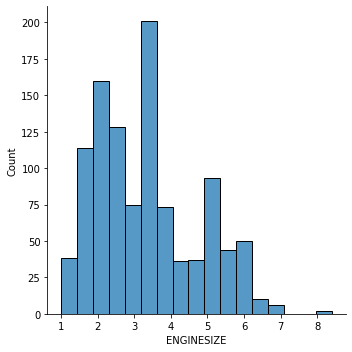

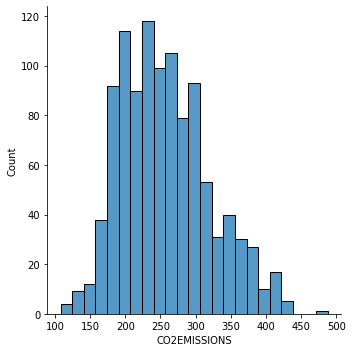

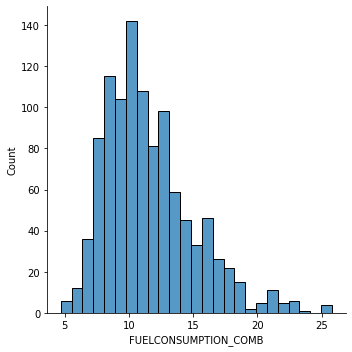

In [ ]:
sns.displot(viz["CYLINDERS"])
sns.displot(viz["ENGINESIZE"])
sns.displot(viz["CO2EMISSIONS"])
sns.displot(viz["FUELCONSUMPTION_COMB"])
plt.show() 

$ \ $

$(3)$ Now, let's plot each of these features against the Emission, to see how linear their relationship is:


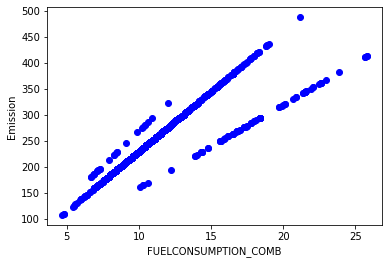

In [ ]:
plt.scatter(cdf["FUELCONSUMPTION_COMB"], cdf["CO2EMISSIONS"],  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

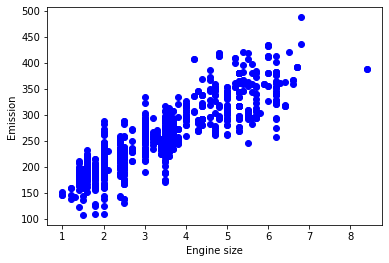

In [ ]:
plt.scatter(cdf["ENGINESIZE"], cdf["CO2EMISSIONS"],  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

$ \ $

-----

## ***Practice.***

Plot ***cylinders*** vs the ***emission***, to see how linear is their relationship is:


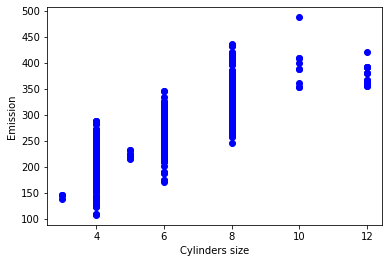

In [ ]:
plt.scatter(cdf["CYLINDERS"], cdf["CO2EMISSIONS"],  color='blue')
plt.xlabel("Cylinders size")
plt.ylabel("Emission")
plt.show()

<details><summary>Click here for the solution</summary>

```python
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

```

</details>


$ \ $

----

# ***Creating train and test dataset.***

$ \ $

$\color{aquamarine}{\text{(Train/Test)}}$ split involves splitting the dataset into: 

* $\color{yellow}{\text{Training sets}}$  that are mutually exclusive.

* $\color{yellow}{\text{Testing sets}}$ that are mutually exclusive. 


After which, you train with the training set and test with the testing set. This will provide a more accurate (precisa) evaluation on ***`out-of-sample accuracy`*** (precisión fuera de la muestra) because:

* The testing dataset is not part of the dataset that have been used to train the model.

* It gives us a better understanding of how well our model generalizes on new data.

This means that we know the outcome of each data point in the testing dataset, making it great to test with! Since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing (prueba fuera de la muestra).




$ \ $

----

## ***Example (spliting a dataset - simple regression model).***

Let's split our dataset into train and test sets. For this, we will have that:

* 80% of the entire dataset will be used for training.

* 20% for testing. 

$(1)$ We create a mask to select random rows using $\color{yellow}{\text{ np.random.rand()}}$ function:

In [ ]:
# help(np.random.rand)

In [ ]:
msk = np.random.rand(len(df)) < 0.8
msk 

array([ True,  True, False, ...,  True, False,  True])

$ \ $

$(2)$ We create the train data and the test data.

In [ ]:
train = cdf[msk]
test = cdf[~msk]

$ \ $

$(3)$ We show scatter plot to show the relationship between ***`train["ENGINESIZE"]`***, ***`train["CO2EMISSIONS"]`***.


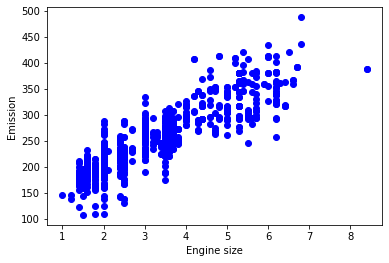

In [ ]:
plt.scatter(train["ENGINESIZE"], train["CO2EMISSIONS"],  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

$ \ $

$(4)$ We model ***`train["ENGINESIZE"]`*** and  ***`train["CO2EMISSIONS"]`*** using sklearn package.


In [ ]:
# help(np.asanyarray)

In [ ]:
from sklearn import linear_model

#(1) creamos el objeto de regresion lineal
reg = linear_model.LinearRegression()

#(2) convertimos los dataframes en ndarrays
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

#(3) ajustamos los ndarrays al objeto reg
reg.fit(train_x, train_y)

LinearRegression()

In [ ]:
#(1) pendiente de la regresion lineal
m = reg.coef_[0][0]

#(2) intersepto con el eje y
b = reg.intercept_[0]

#(3) mostramos en pantalla los resultados
print ('Slope: ', m)
print ('Intercept: ', b)


Slope:  38.702216795218945
Intercept:  126.83291532090178


As mentioned before, **Coefficient** and **Intercept** in the simple linear regression, are the parameters of the fit line.
Given that it is a simple linear regression, with only 2 parameters, and knowing that the parameters are the intercept and slope of the line, sklearn can estimate them directly from our data.
Notice that all of the data must be available to traverse and calculate the parameters.


$ \ $

$(5)$ We plot the fit line over the data:


Text(0, 0.5, 'Emission')

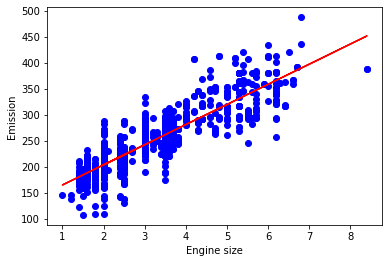

In [ ]:
#(1) aqui mostramos la grafica de datos esparcida que relaciona a train["ENGINESIZE"] y train["CO2EMISSIONS"]
plt.scatter(train["ENGINESIZE"], train["CO2EMISSIONS"],  color='blue')

#(2) Mostramos la regresion lineal correspondiente
plt.plot(train_x, m*(train_x) + b, 'r')

#(3) Etiquetamos los ejes
plt.xlabel("Engine size")
plt.ylabel("Emission")


## ***Evaluation metrics.***

We compare the actual values and predicted values to calculate the accuracy (precision) of a regression model. $\color{aquamarine}{\text{Evaluation metrics}}$ provide a key role in the development of a model, as it provides insight (conocimiento) to areas that require improvement. There are different model evaluation metrics, lets use MSE (Mean Squared Error) here to calculate the accuracy (precision) of our model based on the test set:

*   $\color{yellow}{\text{Mean Absolute Error (MAE):}}$ It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.

*   $\color{yellow}{\text{Mean Squared Error (MSE):}}$ It is the mean of the squared error. It’s more popular than Mean Absolute Error because the focus is geared (engranada) more towards large errors. This is due (debido) to the squared term exponentially increasing larger errors in comparison to smaller ones.

*   $\color{yellow}{\text{Root Mean Squared Error (RMSE).}}$

*   $\color{yellow}{\text{R-squared (R^2) }}$ is not an error, but rather a popular metric to measure the performance of your regression model. It represents how close the data points are to the fitted regression line. The higher the R-squared value, the better the model fits your data. The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).


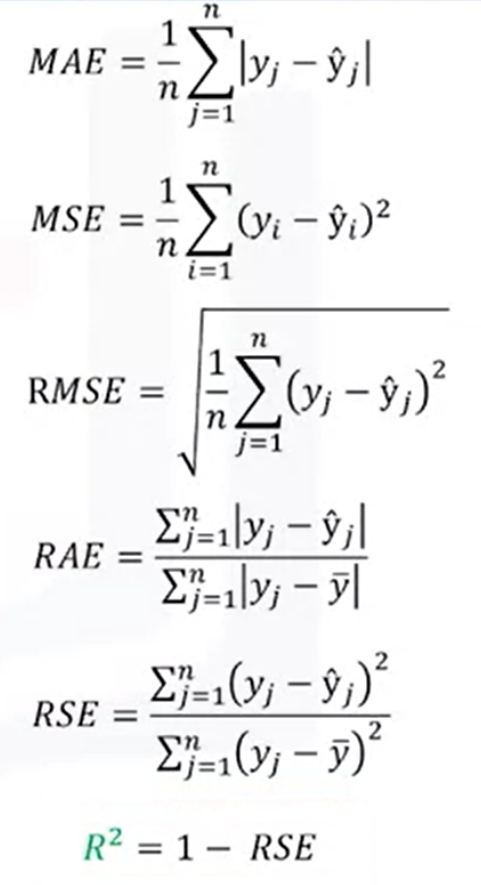

In [ ]:
from sklearn.metrics import r2_score

#(1) creamos el objeto de regresion lineal
reg = linear_model.LinearRegression()

#(2) convertimos los dataframes en ndarrays
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

#(3) ajustamos los ndarrays al objeto reg
reg.fit(train_x, train_y)

#(4) realizamos regresion lineal con la data de test_x para describir una aproximacion de train_y
test_y_ = reg.predict(test_x)


In [ ]:
#(1) calculamos la media de los valores absolutos del array test_y_ - test_y
mean_absolute = np.mean(np.absolute(test_y_ - test_y))
mean_square = np.mean((test_y_ - test_y) ** 2)
r_square = r2_score(test_y , test_y_)

#(2) mostramos en pantalla los resultados
print("Mean absolute error (MAE): ", mean_absolute)
print("Residual sum of squares (MSE): ", mean_square)
print("R2-score: ", r_square)

Mean absolute error (MAE):  22.983647462315393
Residual sum of squares (MSE):  961.6996070342926
R2-score:  0.7720202927024264


$ \ $

----

## ***Example (spliting a dataset - simple regression model).***


Let's see what the evaluation metrics are if we trained a regression model using the `FUELCONSUMPTION_COMB` feature. 

In [ ]:
from sklearn.metrics import r2_score

#(1) creamos el objeto de regresion lineal
regr = linear_model.LinearRegression()

#(2) convertimos los dataframes en ndarrays
test_x = np.asanyarray(test[['FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

#(3) ajustamos los ndarrays al objeto reg
regr.fit(train_x, train_y)

#(4) realizamos regresion lineal con la data de test_x para describir una aproximacion de train_y
test_y_ = regr.predict(test_x)

#(5) calculamos la media de los valores absolutos del array test_y_ - test_y
mean_absolute = np.mean(np.absolute(test_y_ - test_y))
mean_square = np.mean((test_y_ - test_y) ** 2)
r_square = r2_score(test_y , test_y_)

#(6) mostramos en pantalla los resultados
print("Mean absolute error (MAE): ", mean_absolute)
print("Residual sum of squares (MSE): ", mean_square)
print("R2-score: ", r_square)


Mean absolute error (MAE):  317.80605802574684
Residual sum of squares (MSE):  108446.34459051923
R2-score:  -24.70820006205614
